In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [5]:
data_df = pd.read_csv('../data/Iris.csv', index_col='Id')
data_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
FEAT_COLS = data_df.columns.tolist()[:-1]
X = data_df[FEAT_COLS].values
y = data_df['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=10)

## 1. Modeling
使用决策树，可不做特征归一化Minmaxscaler

In [50]:
depth = [2,3,5]
model_list = []
for d in depth:
    dt_model = DecisionTreeClassifier(max_depth=d)
    dt_model.fit(X_train,y_train)
    acc_te = dt_model.score(X_test,y_test)
    acc_tr = dt_model.score(X_train,y_train)
    model_list.append(dt_model)
    print('Train Set --- depth: {} -> accuracy: {:.2f}%'.format(d,acc_tr*100))
    print('Test Set --- depth: {} -> accuracy: {:.2f}%'.format(d,acc_te*100))
    print()

# depth=5 -> overfitting

Train Set --- depth: 2 -> accuracy: 97.00%
Test Set --- depth: 2 -> accuracy: 92.00%

Train Set --- depth: 3 -> accuracy: 98.00%
Test Set --- depth: 3 -> accuracy: 92.00%

Train Set --- depth: 5 -> accuracy: 100.00%
Test Set --- depth: 5 -> accuracy: 90.00%



- 分类问题：
    - Models
        1. logistic regression
        2. SVC
        3. KNN
        4. neural network - MLP
        5. decision tree - no need feature engineering
    - GridsearchCV - Hyper paramters 
        1. logistic regression - C
        2. SVC - C
        3. KNN - n_neighbors, p
        4. MLP - activation, hidden_layer_sizes
        5. decision tree - max_depth, criterion?


## 2. Tree visualization
- export_graphviz - make dot file
- pydotplus.graph_from_dot_data - binary image
- from IPython.display import Image - show image

In [21]:
class_names = list(data_df['Species'].value_counts().index)

In [36]:
tem_dot_file = 'tem_dot_file.dot'
export_graphviz(dt_model,out_file=tem_dot_file,feature_names=FEAT_COLS,class_names=class_names, filled=True)

In [37]:
with open(tem_dot_file) as f:
    dot_graph = f.read()
graph = pydotplus.graph_from_dot_data(dot_graph)
graph

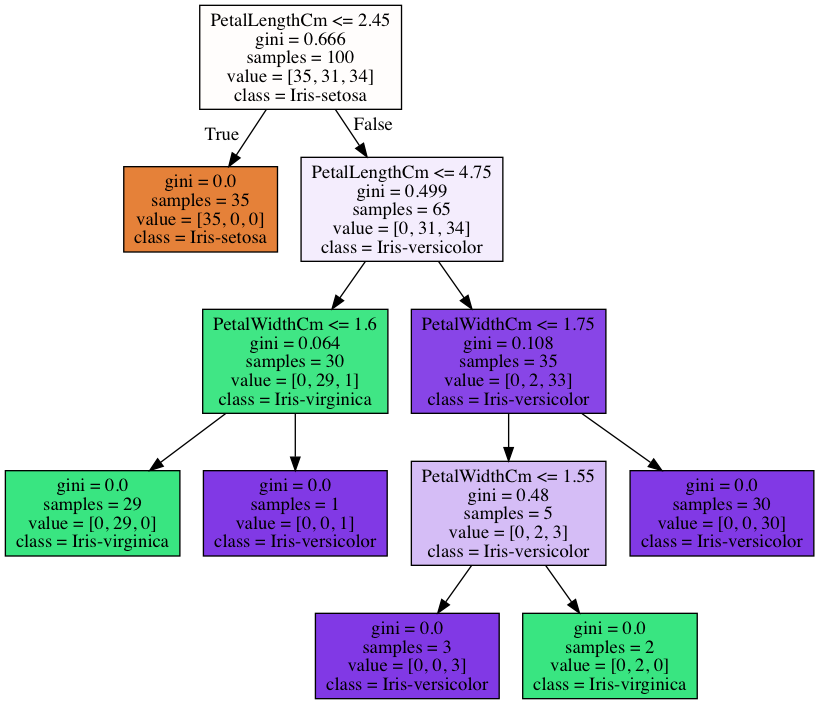

In [38]:
from IPython.display import Image

graph.write_png('decision_tree.png')
Image(graph.create_png())

## 3. Feature Importance

- 通过feature_importances_可以找到信息增益高的特征（最有分辨率的特征）
- 舍弃信息增益低的特征，以便模型可以更快速执行

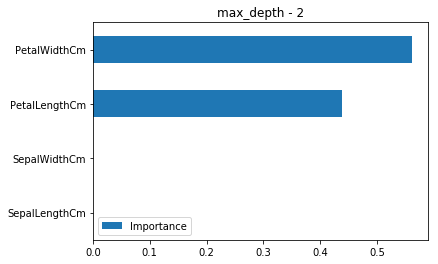

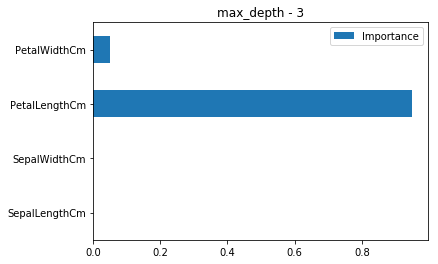

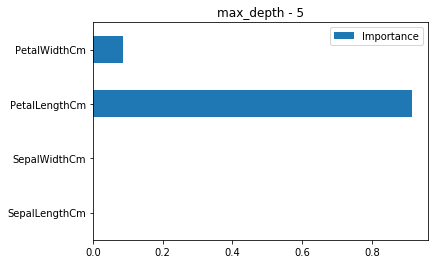

In [54]:
for m in model_list:
    feature_importance_df = pd.DataFrame(m.feature_importances_, columns=['Importance'],index=FEAT_COLS)
    feature_importance_df.plot(kind='barh',title='max_depth - {}'.format(m.max_depth))

```python
"""
    任务：鸢尾花识别
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
import matplotlib.pyplot as plt
import numpy as np

DATA_FILE = './data/Iris.csv'

CATEGRORY_LABEL_DICT = {
        'Iris-setosa':      0,  # 山鸢尾
        'Iris-versicolor':  1,  # 变色鸢尾
        'Iris-virginica':   2   # 维吉尼亚鸢尾
    }

# 使用的特征列
FEAT_COLS = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


def plot_decision_tree(dt_model):
    """
        可视化树的结构
    """
    tmp_dot_file = 'decision_tree_tmp.dot'
    cat_names = list(CATEGRORY_LABEL_DICT.keys())
    export_graphviz(dt_model, out_file=tmp_dot_file, feature_names=FEAT_COLS, class_names=cat_names,
                    filled=True, impurity=False)
    with open(tmp_dot_file) as f:
        dot_graph = f.read()
    graph = pydotplus.graph_from_dot_data(dot_graph)
    graph.write_png('decision_tree.png')


def inspect_feature_importances(dt_model):
    """
        特征重要性
    """
    print('特征名称：', FEAT_COLS)
    print('特征重要性：', dt_model.feature_importances_)
    n_features = len(FEAT_COLS)

    plt.figure()
    plt.barh(range(n_features), dt_model.feature_importances_)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature name')
    plt.yticks(np.arange(n_features), FEAT_COLS)
    plt.tight_layout()
    plt.show()


def main():
    """
        主函数
    """
    iris_data = pd.read_csv(DATA_FILE, index_col='Id')

    # 添加label一列作为预测标签
    iris_data['Label'] = iris_data['Species'].apply(lambda category_name: CATEGRORY_LABEL_DICT[category_name])

    # 4列花的属性作为样本特征
    X = iris_data[FEAT_COLS].values
    # label列为样本标签
    y = iris_data['Label'].values

    # 将原始数据集拆分成训练集和测试集，测试集占总样本数的1/3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

    # 建立模型
    dt_model = DecisionTreeClassifier(max_depth=4)
    dt_model.fit(X_train, y_train)

    # 可视化树的结构
    plot_decision_tree(dt_model)

    # 特征重要性
    inspect_feature_importances(dt_model)


if __name__ == '__main__':
    main()
```